# Iris classification problem

## Problem Statement

Main goal: Build ANN model to predict species of iris flower based on sepal and petal dimensions.

> Feature Variables
> - Sepal Length
> - Sepal Width
> - Petal Length
> - Petal Width

> Target class: Species
> - Setosa
> - Versicolor
> - Virginica


In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models as k_models
from sklearn.datasets import load_iris

In [12]:
# Load the dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['Species'] = iris.target

In [13]:
#Use a Label encoder to convert String to numeric values for the target variable
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

np_iris = iris_data.to_numpy() #Convert input to numpy array

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [14]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

## Creating a deep learning model
> Creating a model in Keras requires defining the following
> - Number of hidden layers
> - Number of nodes in each layer
> - Activation functions
> - Loss Function & Accuracy measurements

In [15]:
#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = k_models.Sequential([
    Input(shape=(4,)), #Input layer with 4 variables
    BatchNormalization(),
    Dense(128, name='Hidden-Layer-1',
          activation='relu'), #First hidden layer with 128 nodes
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, name='Hidden-Layer-2',
          activation='relu'), #Second hidden layer with 128 nodes
    BatchNormalization(),
    Dropout(0.3),
    Dense(NB_CLASSES,
          name='Output-Layer',
          activation='softmax') #Output layer with 3 nodes
])

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,579 (72.57 KB)

 Trainable params: 18,059 (70.54 KB)

 Non-trainable params: 520 (2.03 KB)

## Training and evaluation

 > Training the model involves defining various training models and then perform 
forward and back propagation.

In [16]:

#Setup Hyper Parameters for training

VERBOSE = 1 #Make it verbose so we can see the progress
BATCH_SIZE = 16 #Set Batch size
EPOCHS = 6 #Set number of epochs
VALIDATION_SPLIT = 0.2 #Set validation split. 20% of the training data will be used for validation after each epoch

print("\nTraining Progress:\n-------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(
    X_train, # Training data
    Y_train, # Target data
    batch_size=BATCH_SIZE, # Batch size
    epochs=EPOCHS, # Number of epochs
    verbose=VERBOSE, # Verbose
    validation_split=VALIDATION_SPLIT # Validation split
)


Training Progress:
-------------------------------------
Epoch 1/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6699 - loss: 1.0375 - val_accuracy: 0.7407 - val_loss: 0.8136
Epoch 2/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8421 - loss: 0.4382 - val_accuracy: 0.7407 - val_loss: 0.7508
Epoch 3/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7947 - loss: 0.5215 - val_accuracy: 0.7407 - val_loss: 0.7014
Epoch 4/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8963 - loss: 0.2749 - val_accuracy: 0.8148 - val_loss: 0.6539
Epoch 5/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8878 - loss: 0.2514 - val_accuracy: 0.8889 - val_loss: 0.5955
Epoch 6/6
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9419 - loss: 0.2747 - val_accuracy: 0.8889 - val_loss: 0.5954



Accuracy during Training :
------------------------------------


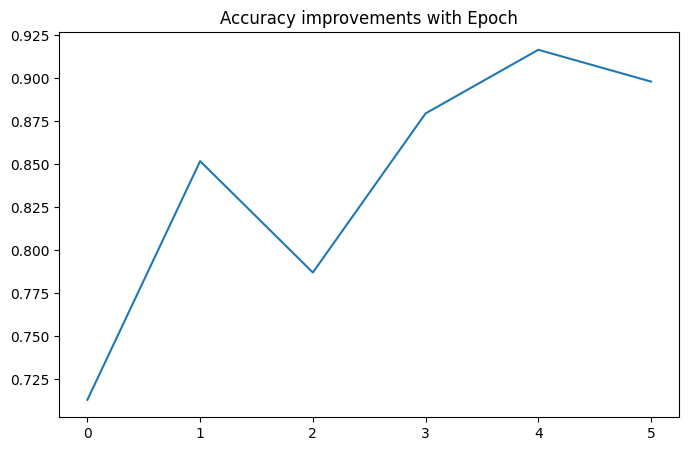


Evaluation against Test Dataset :
------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9333 - loss: 0.5807


[0.5807198882102966, 0.9333333373069763]

In [17]:
print("\nAccuracy during Training :\n------------------------------------")
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

## Saving and loading models
> The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [18]:
#Saving a model
model.save("iris_save.keras")

#Loading a Model 
loaded_model = k_models.load_model("iris_save.keras")

#Print Model Summary
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,640 (143.13 KB)

 Trainable params: 18,059 (70.54 KB)

 Non-trainable params: 520 (2.03 KB)

 Optimizer params: 18,061 (70.55 KB)

## Prediction with deep learning model

In [19]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Raw Prediction Output (Probabilities) : [[0.2404506  0.41557223 0.34397718]]
Prediction is  [1]
